In [189]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas
import urllib
import re

from selenium import webdriver
from time import sleep
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.common.exceptions import NoSuchElementException, WebDriverException

import csv
import time

from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd
from sodapy import Socrata

import numpy as np
import datetime

import pandas as pd
pd.set_option("display.max_columns", 2200)
pd.set_option("display.max_rows", 200)
import numpy as np
import seaborn  as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline  
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import re
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Keeping track of runtime.
import timeit

# Decision trees
from sklearn import tree
from IPython.display import Image

# Packages for rendering tree.
import pydotplus
import graphviz

import itertools #(for confusion matrix)

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#A quick look at https://www.leafly.com/explore/page-61/sort-alpha shows 
#that this is the last page of strains
pages = 61 
websites = []
strain_names = []

for i in range(pages+1):
    page_url = "https://www.leafly.com/explore/page-"+str(i)+"/sort-alpha"
    html = requests.get(page_url).text
    soup = BeautifulSoup(html,'html.parser')
    urls = soup.findAll("a",{"class":"ga_Explore_Strain_Tile"})
        
    for url in urls:
        strain_name = url.get('href')
        strain_names.append(strain_name)
        website = ("https://www.leafly.com" + strain_name)
        websites.append(website)

In [ ]:
#create url df
url_df = pd.DataFrame(websites, columns = ['url'])

In [ ]:
#create url csv
url_df.to_csv('urls.csv')

In [ ]:
#create strain_names csv
strains_df = pd.DataFrame(strain_names, columns = ['strain_name'])

In [ ]:
#create strain_names csv
strains_df.to_csv('strains.csv')

In [ ]:
#parse strain_name:
parsed =[]
for words in strains_df['strain_name']:
    parse = re.findall(r"[\w']+", words)
    parsed.append(parse)

In [ ]:
#create name and strain df

strain_type_df = pd.DataFrame(parsed, columns = ['strain', 'name1', 'name2',
                                    'name3', 'name4', 'name5', 'name6'])

In [ ]:
#drop last 5 columns - just fillers
strain_type_df.drop(df.tail(5).index,inplace=True)

In [ ]:
#merge name columns
strain_type_df['name'] = strain_type_df[strain_type_df.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1)

In [ ]:
#drop unnecessary columns
strain_type_df.drop(['name1', 'name2', 'name3', 'name4', 'name5', 'name6'], axis=1, inplace=True)

In [ ]:
strain_type_df.to_csv('strain_type.csv')

In [ ]:
#number of duplicates
df['name'].duplicated().sum()

In [ ]:
url_df['url'].duplicated().sum()

In [ ]:
url_df.drop_duplicates(inplace=True)

In [ ]:
url_df.reset_index()

In [ ]:
len(url_df)

In [ ]:
#breaking down scraping into smaller buckets

urls_to_200 = urls_df['url'][:200]          #soups
urls_to_700 = urls_df['url'][200:700]       #soups_to_700
urls_to_1200 = urls_df['url'][700:1200]     #soups_to_1200
urls_to_1700 = urls_df['url'][1200:1700]    #soups_to_1700
urls_to_2200 = urls_df['url'][1700:2200]    #soups_to_2200
urls_to_2700 = urls_df['url'][2200:2700]    #soups_to_2700
urls_to_end = urls_df['url'][2700:]         #soups_to_end

#scraping all at once
urls_total = urls_df['url']                 #soups_total

In [ ]:
#scrape individual strain pages

soups_total = []

for url in urls_total:
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')
    soups_total.append(soup)
    time.sleep(1)

In [ ]:
# with open("soups_total.html", "w") as file:
#     file.write(str(soups_total))

### Get Features From Tags

In [ ]:
#use this one

#collect positive effects

effect = []
filename1 = "effect.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'effects-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    effect.append(par)

df_effect = pd.DataFrame(effect)
df_effect.to_csv(filename1)

#collect medical attributes

med = []
filename2 = "med.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'medical-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    med.append(par)

df_med = pd.DataFrame(med)
df_med.to_csv(filename2)

#collect negative attributes

neg = []
filename3 = "neg.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'negatives-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    neg.append(par)

df_neg = pd.DataFrame(neg)
df_neg.to_csv(filename3)

#collect flavors

flavors = []
filename4 = "flavors.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href')
            strain = strain_name.split('/')
        first_child = soups_total[i].findAll('div',attrs={"class" : "flavor-name"})
        try:
            if len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                        first_child[2].text]
                par = {key:values}
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    flavors.append(par)

df_flavors = pd.DataFrame(flavors)
df_flavors.to_csv(filename4)  

# #collect parents of strains

# parents = []

# filename5 = 'parents.csv'

# for i in tqdm(range(0, len(soups_total))): 
#     children = soups_total[i].findAll('div',attrs={"class" : "strain-tile-footer"})
#     try:
#         if len(children) == 3:
#             key = children[0].text
#             values = [children[1].text, children[2].text]
#             par = {key:values}
#         elif len(children) == 2:
#             key = children[0].text
#             values = children[1].text
#             par = {key:values}        
#         else:
#             key = children[0].text
#             values = None
#             par = {key:values}
#     except:
#         None
#         #print("can't find that page")
    
#     parents.append(par)
   

# df_parents = pd.DataFrame(parents)
# df_parents.to_csv(filename5)

### Create Tokens

In [311]:
category_tokens = ['hyrid', 'indica', 'sativa']

flavor_tokens = ['1. ammonia', '2. ammonia', '3. ammonia',
                 '1. apple', '2. apple', '3. apple', 
                 '1. apricot', '2. apricot', '3. apricot',
                 '1. berry', '2. berry', '3. berry,
                 '1. blue cheese', '2. blue cheese', '3. blue cheese', 
                 '1. blueberry', '2. blueberry', '3. blueberry',
                 '1. butter', '2. butter', '3. butter', 
                 '1. cheese', '2. cheese', '3. cheese', 
                 '1. chemical', '2. chemical', '3. chemical', 
                 '1. chestnut', '2. chestnut', '3. chestnut', 
                 '1. citrus', '2. citrus', '3. citrus',
                 '1. coffee', '2. coffee', '3. coffee', 
                 '1. diesel', '2. diesel', '3. diesel', 
                 '1. earthy', '2. earthy', '3. earthy', 
                 '1. flowery', '2. flowery', '3. flowery',
                 '1. grape', '2. grape', '3. grape', 
                 '1. grapefruit', '2. grapefruit', '3. grapefruit', 
                 '1. honey', '2. honey', '3. honey',
                 '1. lavender', '2. lavender', '3. lavender',
                 '1. lemon', '2. lemon', '3. lemon', 
                 '1. lime', '2. lime', '3. lime', 
                 '1. mango', '2. mango', '3. mango', 
                 '1. menthol', '2. menthol', '3. menthol', 
                 '1. mint', '2. mint', '3. mint',
                 '1. nutty', '2. nutty', '3. nutty', 
                 '1. orange', '2. orange', '3. orange', 
                 '1. peach', '2. peach', '3. peach', 
                 '1. pear', '2. pear', '3. pear', 
                 '1. pepper', '2. pepper', '3. pepper',
                 '1. pine', '2. pine', '3. pine', 
                 '1. pineapple', '2. pineapple', '3. pineapple', 
                 '1. plum', '2. plum', '3. plum', 
                 '1. pungent', '2. pungent', '3. pungent', 
                 '1. rose', '2. rose', '3. rose', 
                 '1. sage', '2. sage', '3. sage', 
                 '1. skunk', '2. skunk', '3. skunk', 
                 '1. spicy/herbal', '2. spicy/herbal', '3. spicy/herbal', 
                 '1. strawberry', '2. strawberry', '3. strawberry',
                 '1. sweet', '2. sweet', '3. sweet', 
                 '1. tar', '2. tar', '3. tar', 
                 '1. tea', '2. tea', '3. tea', 
                 '1. tobacco', '2. tobacco', '3. tobacco', 
                 '1. tree fruit', '2. tree fruit', '3. tree fruit',
                 '1. tropical', '2. tropical', '3. tropical', 
                 '1. vanilla', '2. vanilla', '3. vanilla', 
                 '1. violet', '2. violet', '3. violet', 
                 '1. woody', '2. woody', '3. woody']

effect_tokens = ['anxious', 'aroused', 'creative', 'energetic',
                 'euphoric', 'focused', 'giggly', 'happy', 
                 'hungry', 'relaxed', 'sleepy', 'talkative',
                 'tingly', 'uplifted']

medical_tokens = ['cramps', 'depression', 'eye pressure', 'fatigue',
                  'headaches', 'inflammation', 'insomnia', 
                  'lack of appetite', 'muscle spasms', 'nausea',
                  'pain', 'seizures', 'spasticity', 'stress']

negative_tokens = ['dry mouth', 'dry eyes', 'anxious',
                  'dizzy', 'paranoid', 'headache']

disease_tokens = ['ADD/ADHD',
                  "Alzheimer's", 'Anorexia', 'Anxiety', 'Arthritis',
                  'Asthma', 'Bipolar Disorder', 'Cachexia', 'Cancer',
                  "Crohn's Disease", 'Epilepsy', 'Fibromyalgia', 
                  'Gastrointestinal Disorder', 'Glaucoma', 'HIV/AIDS',
                  'Hypertension', 'Migraines', 'Multiple Sclerosis',
                  'Muscular Dystrophy', 'PMS', 'PTSD', "Parkinson's",
                  'Phantom Limb Pain', 'Spinal Cord Injury',
                  'Tinnitus', "Tourette's Syndrome"]

46

In [ ]:
with open('soups_total.html', 'r') as f:
    html = f.read()
soups_total = BeautifulSoup(html,'html.parser')

### Import CSVs

In [3]:
#import categories - hybrid, sativa, indica
cat_df = pd.read_csv('strain_category.csv')

#import flavors
flav_df = pd.read_csv('flavors.csv')

#import parents
par_df = pd.read_csv('parents.csv')

#import effects
eff_df = pd.read_csv('effect.csv')

#import medical
med_df = pd.read_csv('med.csv')

#import negative
neg_df = pd.read_csv('neg.csv')

### Pivot Tables/Table Formatting

In [4]:
#drop first column
def drop_column(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

In [6]:
#pivot tables so that column names are now indices
flav_series = flav_df.stack()
par_series = par_df.stack()
eff_series = eff_df.stack()
med_series = med_df.stack()
neg_series = neg_df.stack()

#convert from series to dataframe
flav_df = flav_series.to_frame(name='flavor')
par_df = par_series.to_frame(name='parent')
eff_df = eff_series.to_frame(name='effect')
med_df = med_series.to_frame(name='medical')
neg_df = neg_series.to_frame(name='negative')

#dataframe cleanup
def reset_index(df):
    df.reset_index(inplace=True)
    df.drop('level_0', axis=1, inplace=True)
    df.rename(columns={'level_1':'strain'}, inplace=True)

In [7]:
reset_index(flav_df)
reset_index(par_df)
reset_index(eff_df)
reset_index(med_df)
reset_index(neg_df)

In [8]:
#cat_df.reset_index('name', inplace=True)
cat_df.rename(columns={'strain':'category'}, inplace=True)
cat_df.rename(columns={'name':'strain'}, inplace=True)

#remove $ from parents table
par_df['strain'] = [x.strip('$') for x in par_df.strain]

#make all entries lowercase
flav_df = flav_df.apply(lambda x: x.astype(str).str.lower())
par_df = par_df.apply(lambda x: x.astype(str).str.lower())
eff_df = eff_df.apply(lambda x: x.astype(str).str.lower())
med_df = med_df.apply(lambda x: x.astype(str).str.lower())
neg_df = neg_df.apply(lambda x: x.astype(str).str.lower())
cat_df = cat_df.apply(lambda x: x.astype(str).str.lower())


#replace - with space in all tables
flav_df['strain'] = flav_df['strain'].str.replace('-',' ')
par_df['strain'] = par_df['strain'].str.replace('-',' ')
eff_df['strain'] = eff_df['strain'].str.replace('-',' ')
med_df['strain'] = med_df['strain'].str.replace('-',' ')
neg_df['strain'] = neg_df['strain'].str.replace('-',' ')
cat_df['strain'] = cat_df['strain'].str.replace('-',' ')


# #make all data lowercase
# def lowercase(df):
#     df = df.apply(lambda x: x.astype(str).str.lower())
#     return
    
# #replace dash with space in all tables
# def replace_dash(df, column):
#     df[column] = df[column].str.replace('-',' ')
#     return

In [9]:
def remove_char(df, column):
    df[column] = df[column].str.replace('[',' ')
    df[column] = df[column].str.replace(']',' ')
    df[column] = df[column].str.replace("'",'')
    

def new_columns_5(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]
    df[str(column) + '_4']= new3[1]


    new4 = df[str(column) + '_4'].str.split(',', n = 1, expand = True)
    df[str(column) + '_4']= new4[0]
    df[str(column) + '_5']= new4[1]


    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_3(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_2(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True)

In [10]:
remove_char(flav_df, 'flavor')
remove_char(par_df, 'parent')
remove_char(eff_df, 'effect')
remove_char(med_df, 'medical')
remove_char(neg_df, 'negative')
remove_char(cat_df, 'category')

In [11]:
new_columns_5(eff_df, 'effect')
new_columns_5(med_df, 'medical')
new_columns_5(neg_df, 'negative')

In [12]:
new_columns_3(flav_df, 'flavor')
new_columns_2(par_df, 'parent')

In [13]:
par_df['strain'] = par_df['strain'].str.replace("'",'')

In [14]:
par_df.head(200)

,strain,parent_1,parent_2
0,100 og,og kush,None
1,12 year og,og kush,None
2,13 dawgs,g13,chemdawg
3,24k gold,kosher kush,tangie
4,3 bears og,triangle kush,None
5,100 og,og kush,None
6,12 year og,og kush,None
7,13 dawgs,g13,chemdawg
8,24k gold,kosher kush,tangie
9,3 bears og,triangle kush,None


### Create Final Merged Dataframe

In [16]:
#create properly formatted csvs

flav_final_df = pd.DataFrame(flav_df)
flav_final_df.to_csv('flav_final_df.csv')

par_final_df = pd.DataFrame(par_df)
par_final_df.to_csv('par_final_df.csv')

eff_final_df = pd.DataFrame(eff_df)
eff_final_df.to_csv('eff_final_df.csv')

med_final_df = pd.DataFrame(med_df)
med_final_df.to_csv('med_final_df.csv')

neg_final_df = pd.DataFrame(neg_df)
neg_final_df.to_csv('neg_final_df.csv')

cat_final_df = pd.DataFrame(cat_df)
cat_final_df.to_csv('cat_final_df.csv')

In [17]:
#import final csvs

flav_df = pd.read_csv('flav_final_df.csv')
par_df = pd.read_csv('par_final_df.csv')
eff_df = pd.read_csv('eff_final_df.csv')
med_df = pd.read_csv('med_final_df.csv')
neg_df = pd.read_csv('neg_final_df.csv')
cat_df = pd.read_csv('cat_final_df.csv')

In [18]:
#create master dataframe
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

final_df = pd.merge(cat_df, eff_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, med_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, neg_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, flav_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, par_df, how='outer')
final_df.drop_duplicates(inplace=True)

final_df.to_csv('final_df.csv')

In [289]:
total_reviews = pd.read_csv('total_reviews.csv')

In [292]:
final_df = pd.merge(final_df, total_reviews, how='outer')

In [294]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [297]:
final_df.drop_duplicates(inplace=True)

In [303]:
# final_df.to_csv('final_df.csv')

In [516]:
final_df = pd.read_csv('final_df.csv')

In [518]:
final_df.drop('parent_1', axis=1, inplace=True)

In [519]:
final_df.drop('parent_2', axis=1, inplace=True)

In [512]:
master_parent = pd.read_csv('master_parent.csv')

In [521]:
final_df = pd.merge(final_df, master_parent, on='strain')

In [525]:
final_df.drop('Unnamed: 0_y', axis=1, inplace=True)

In [527]:
final_df.drop('Unnamed: 0_x', axis=1, inplace=True)

In [530]:
final_df.drop_duplicates(inplace=True)

In [533]:
# final_df.to_csv('master_final.csv')

In [ ]:
""" I needed to rescrape to get additional information and in the process my ip got blocked.
    I moved to working in smaller scrape batches. I then needed to append each of my smaller
    batches into a master table. """

In [80]:
urls = pd.read_csv('urls.csv')

In [194]:
urls_list = urls['url']

In [423]:
#urls_to_156 = urls_list[:156]                  #parents1.csv
#urls_156_to_312 = urls_list[156:312]           #parents2.csv
#urls_312_to_468 = urls_list[312:468]           #parents3.csv
#urls_468_to_624 = urls_list[468:624]           #parents4.csv
#urls_624_to_780 = urls_list[624:780]           #parents5.csv
#urls_780_to_936 = urls_list[780:936]            #parents6.csv
#urls_936_to_1092 = urls_list[936:1092]          #parents7.csv
#urls_1092_to_1248 = urls_list[1092:1248]        #parents8.csv
#urls_1248_to_1404 = urls_list[1248:1404]        #parents9.csv
#urls_1404_to_1560 = urls_list[1404:1560]        #parents10.csv
urls_1560_to_1716 = urls_list[1560:1716]        #parents11.csv
urls_1716_to_1872 = urls_list[1716:1872]        #parents12.csv
urls_1872_to_2028 = urls_list[1872:2028]        #parents13.csv
urls_2028_to_2184 = urls_list[2028:2184]        #parents14.csv
urls_2184_to_2340 = urls_list[2184:2340]        #parents15.csv
urls_2340_to_2496 = urls_list[2340:2496]        #parents16.csv
urls_2496_to_2652 = urls_list[2496:2652]        #parents17.csv
urls_2652_to_2808 = urls_list[2652:2808]        #parents18.csv
urls_2808_to_2964 = urls_list[2808:2964]        #parents19.csv
urls_2964_to_3120 = urls_list[2964:3120]        #parents20.csv
urls_3120_to_3276 = urls_list[3120:3276]        #parents21.csv
urls_3276_to_3432 = urls_list[3276:]            #parents22.csv


#urls_1560_to_2060 = urls_list[1560:2060]         #parents11.csv
#urls_2060_to_2560 = urls_list[2060:2560]         #parents12.csv
#urls_2560_to_3060 = urls_list[2560:3060]         #parents13.csv
#urls_3060_to_end = urls_list[3060:]              #parents14.csv

In [253]:
# #scrape for review totals and parents

parents = []
reviews = []

for url in tqdm(urls_list):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
    except:
        None
    
    try:
        parent = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents.append(parent)
    except:
        parents.append(strain[2], None)
    
    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
        review_total = soup.find('a',attrs={"onclick" : "window.strainHelpers.trackEvent('User Interactions', 'Strain Details', 'View all Reviews')"}).text
        review = review_total[review_total.find("(")+1:review_total.find(")")]
        rev_name = [strain[2], review]
    except:
        rev_name = [strain[2], None]
    
    reviews.append(rev_name)

time.sleep(1)

TypeError: append() takes exactly one argument (2 given)

In [428]:
#scrape for parents
# change varaible in 6 places

parents14_ = []

for url in tqdm(urls_3060_to_end):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:

        children = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents14_.append(children)
    
    except:
        None

    time.sleep(2)        
 
parents14 = pd.DataFrame(parents14_)
parents14.to_csv('parents14.csv')

In [205]:
review_totals = pd.DataFrame(reviews)
review_totals.to_csv('review_totals.csv')

In [277]:
parents_final = pd.DataFrame(parents)
parents_final.to_csv('parents_final.csv')

In [208]:
review_totals.rename(columns=({0:'strain', 1:'review_total'}), inplace=True)

In [278]:
review_totals.to_csv('review_totals.csv')
parents_final.to_csv('parents_final.csv')

In [279]:
review_totals = pd.read_csv('review_totals.csv')
parents_final = pd.read_csv('parents_final.csv')

In [ ]:
total_reviews = pd.read_csv('review_totals.csv')

In [ ]:
total_reviews.drop('Unnamed: 0', axis = 1, inplace=True)

In [ ]:
total_reviews.drop('Unnamed: 0.1', axis = 1, inplace=True)

In [ ]:
total_reviews['strain'] = total_reviews['strain'].str.replace('-',' ')

In [ ]:
total_reviews.to_csv('total_reviews.csv')

In [ ]:
parents = pd.read_csv('parents_final.csv')

In [ ]:
final = pd.read_csv('final_df.csv')

In [ ]:
parent1a = pd.read_csv('parents1.csv')
parent2a = pd.read_csv('parents2.csv')
parent3a = pd.read_csv('parents3.csv')
parent4a = pd.read_csv('parents4.csv')
parent5a = pd.read_csv('parents5.csv')
parent6a = pd.read_csv('parents6.csv')
parent7a = pd.read_csv('parents7.csv')
parent8a = pd.read_csv('parents8.csv')
parent9a = pd.read_csv('parents9.csv')
parent10a = pd.read_csv('parents10.csv')
parent11a = pd.read_csv('parents11.csv')
parent12a = pd.read_csv('parents12.csv')
parent13a = pd.read_csv('parents13.csv')
parent14a = pd.read_csv('parents14.csv')
# parent15a = pd.read_csv('parents15.csv')
# parent16a = pd.read_csv('parents16.csv')
# parent17a = pd.read_csv('parents17.csv')
# parent18a = pd.read_csv('parents18.csv')
# parent19a = pd.read_csv('parents19.csv')
# parent20a = pd.read_csv('parents20.csv')
# parent21a = pd.read_csv('parents21.csv')
# parent22a = pd.read_csv('parents22.csv')

In [ ]:
append_list = [parent2a, parent3a, parent4a, parent5a, parent6a, parent7a,
              parent8a, parent9a, parent10a, parent11a, parent12a, parent13a,
              parent14a]             

In [ ]:
master_df = parent1a.append(append_list, ignore_index = True) 

In [ ]:
# master_df.to_csv('master_df.csv')

In [ ]:
master_df = pd.read_csv('master_df.csv')

In [ ]:
def split_string(string):
    try:
        return re.findall('<div class="strain-tile-footer">(.+)</div>', string)
    except:
        return 'n'

In [ ]:
master_df['7'] = master_df['7'].apply(split_string)
master_df.replace('N, o, n, e', 'n')
master_df['7'] = master_df['7'].apply(', '.join)
master_df['7'] = [x.strip('$') for x in master_df['7']]
master_df['7'] = master_df['7'].str.lower()

In [ ]:
def format_values(df, column):
    df[column] = df[column].apply(split_string)
    df[column] = df[column].apply(', '.join)
    df[column] = [x.strip('$') for x in df[column]]
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace("'",'')
    df[column] = df[column].str.replace(".",'')
    df[column] = df[column].str.replace("#",'')

In [ ]:
format_values(master_df, '7')

In [ ]:
master_df.rename(columns={'0': 'strain', '1':'parent_1', '2':'parent_2',
                         '3':'parent_3', '4':'parent_4', '5':'parent_5',
                         '6':'parent_6', '7':'parent_7'}, inplace=True)

In [ ]:
master_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [ ]:
# master_df.to_csv('master_parent.csv')

In [122]:
final_df = pd.read_csv('master_final.csv')

In [123]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [124]:
#strip leading numbers from flavors columns
final_df['flavor_1'] = final_df['flavor_1'].str.strip('1. ')
final_df['flavor_2'] = final_df['flavor_2'].str.strip('2. ')
final_df['flavor_3'] = final_df['flavor_3'].str.strip('3. ')

In [125]:
final_df.fillna('none', inplace=True)

In [126]:
final_df.isnull().sum()

category        0
strain          0
effect_1        0
effect_2        0
effect_3        0
effect_4        0
effect_5        0
medical_1       0
medical_2       0
medical_3       0
medical_4       0
medical_5       0
negative_1      0
negative_2      0
negative_3      0
negative_4      0
negative_5      0
flavor_1        0
flavor_2        0
flavor_3        0
review_total    0
parent_1        0
parent_2        0
parent_3        0
parent_4        0
parent_5        0
parent_6        0
parent_7        0
dtype: int64

### Dummy Categories

In [127]:
category_dummies = pd.get_dummies(final_df['category'], prefix="cat_")
effect1_dummies = pd.get_dummies(final_df['effect_1'], prefix="eff1_")
effect2_dummies = pd.get_dummies(final_df['effect_2'], prefix="eff2_")
effect3_dummies = pd.get_dummies(final_df['effect_3'], prefix="eff3_")
effect4_dummies = pd.get_dummies(final_df['effect_4'], prefix="eff4_")
effect5_dummies = pd.get_dummies(final_df['effect_5'], prefix="eff5_")
med1_dummies = pd.get_dummies(final_df['medical_1'], prefix="med1_")
med2_dummies = pd.get_dummies(final_df['medical_2'], prefix="med2_")
med3_dummies = pd.get_dummies(final_df['medical_3'], prefix="med3_")
med4_dummies = pd.get_dummies(final_df['medical_4'], prefix="med4_")
med5_dummies = pd.get_dummies(final_df['medical_5'], prefix="med5_")
neg1_dummies = pd.get_dummies(final_df['negative_1'], prefix="neg1_")
neg2_dummies = pd.get_dummies(final_df['negative_2'], prefix="neg2_")
neg3_dummies = pd.get_dummies(final_df['negative_3'], prefix="neg3_")
neg4_dummies = pd.get_dummies(final_df['negative_4'], prefix="neg4_")
neg5_dummies = pd.get_dummies(final_df['negative_5'], prefix="neg5_")
flav1_dummies = pd.get_dummies(final_df['flavor_1'], prefix="flav1_")
flav2_dummies = pd.get_dummies(final_df['flavor_2'], prefix="flav2_")
flav3_dummies = pd.get_dummies(final_df['flavor_3'], prefix="flav3_")


final_df = pd.concat([final_df, category_dummies],axis=1)
final_df = pd.concat([final_df, effect1_dummies],axis=1)
final_df = pd.concat([final_df, effect2_dummies],axis=1)
final_df = pd.concat([final_df, effect3_dummies],axis=1)
final_df = pd.concat([final_df, effect4_dummies],axis=1)
final_df = pd.concat([final_df, effect5_dummies],axis=1)
final_df = pd.concat([final_df, med1_dummies],axis=1)
final_df = pd.concat([final_df, med2_dummies],axis=1)
final_df = pd.concat([final_df, med3_dummies],axis=1)
final_df = pd.concat([final_df, med4_dummies],axis=1)
final_df = pd.concat([final_df, med5_dummies],axis=1)
final_df = pd.concat([final_df, neg1_dummies],axis=1)
final_df = pd.concat([final_df, neg2_dummies],axis=1)
final_df = pd.concat([final_df, neg3_dummies],axis=1)
final_df = pd.concat([final_df, neg4_dummies],axis=1)
final_df = pd.concat([final_df, neg5_dummies],axis=1)
final_df = pd.concat([final_df, flav1_dummies],axis=1)
final_df = pd.concat([final_df, flav2_dummies],axis=1)
final_df = pd.concat([final_df, flav3_dummies],axis=1)

In [128]:
to_drop = ['category', 'effect_1', 'effect_2', 'effect_3', 'effect_4',
          'effect_5', 'medical_1', 'medical_2', 'medical_3', 'medical_4',
          'medical_5', 'negative_1', 'negative_2', 'negative_3', 'negative_4',
          'negative_5', 'flavor_1', 'flavor_2', 'flavor_3']
final_df.drop(to_drop, axis=1, inplace=True)

In [129]:
to_drop = ['review_total', 'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']

final_df.drop(to_drop, axis=1, inplace=True)

In [130]:
final_df.head()

,strain,cat__hybrid,cat__indica,cat__sativa,eff1__ aroused,eff1__ creative,eff1__ creative,eff1__ energetic,eff1__ euphoric,eff1__ euphoric,eff1__ focused,eff1__ giggly,eff1__ happy,eff1__ happy,eff1__ hungry,eff1__ relaxed,eff1__ relaxed,eff1__ sleepy,eff1__ sleepy,eff1__ talkative,eff1__ tingly,eff1__ uplifted,eff1__euphoric,eff1__focused,eff1__happy,eff1__none,eff1__relaxed,eff1__uplifted,eff2__ aroused,eff2__ creative,eff2__ energetic,eff2__ energetic,eff2__ euphoric,eff2__ euphoric,eff2__ focused,eff2__ focused,eff2__ giggly,eff2__ happy,eff2__ hungry,eff2__ hungry,eff2__ relaxed,eff2__ relaxed,eff2__ sleepy,eff2__ sleepy,eff2__ talkative,eff2__ talkative,eff2__ tingly,eff2__ tingly,eff2__ uplifted,eff2__ uplifted,eff2__aroused,eff2__energetic,eff2__euphoric,eff2__focused,eff2__giggly,eff2__happy,eff2__hungry,eff2__none,eff2__relaxed,eff2__sleepy,eff2__talkative,eff2__uplifted,eff3__ aroused,eff3__ creative,eff3__ energetic,eff3__ euphoric,eff3__ euphoric,eff3__ focused,eff3__ focused,eff3__ giggly,eff3__ happy,eff3__ happy,eff3__ hungry,eff3__ hungry,eff3__ relaxed,eff3__ relaxed,eff3__ sleepy,eff3__ sleepy,eff3__ talkative,eff3__ talkative,eff3__ tingly,eff3__ tingly,eff3__ uplifted,eff3__ uplifted,eff3__energetic,eff3__euphoric,eff3__focused,eff3__gigg,eff3__happy,eff3__none,eff3__relaxed,eff3__talkative,eff3__uplifted,eff4__ aroused,eff4__ creative,eff4__ creative,eff4__ energetic,eff4__ energetic,eff4__ euphoric,eff4__ euphoric,eff4__ focused,eff4__ focused,eff4__ giggly,eff4__ happy,eff4__ happy,eff4__ hungry,eff4__ hungry,eff4__ relaxed,eff4__ relaxed,eff4__ sleepy,eff4__ sleepy,eff4__ talkative,eff4__ talkative,eff4__ tingly,eff4__ tingly,eff4__ uplifted,eff4__ uplifted,eff4__aroused,eff4__energetic,eff4__euphoric,eff4__giggly,eff4__hungry,eff4__none,eff4__relaxed,eff4__sleepy,eff4__talkative,eff4__uplifted,eff5__ aroused,eff5__ creative,eff5__ energetic,eff5__ euphoric,eff5__ focused,eff5__ giggly,eff5__ happy,eff5__ hungry,eff5__ relaxed,eff5__ sleepy,eff5__ talkative,eff5__ tingly,eff5__ uplifted,eff5__aroused,eff5__creative,eff5__energetic,eff5__euphoric,eff5__focused,eff5__happy,eff5__none,eff5__relaxed,eff5__sleepy,eff5__talkative,eff5__tingly,eff5__uplifted,med1__ cramps,med1__ cramps,med1__ depression,med1__ depression,med1__ eye pressure,med1__ eye pressure,med1__ fatigue,med1__ fatigue,med1__ headaches,med1__ headaches,med1__ inflammation,med1__ inflammation,med1__ insomnia,med1__ insomnia,med1__ lack of appetite,med1__ lack of appetite,med1__ muscle spasms,med1__ muscle spasms,med1__ nausea,med1__ pain,med1__ pain,med1__ seizures,med1__ spasticity,med1__ spasticity,med1__ stress,med1__ stress,med1__cramps,med1__depression,med1__fatigue,med1__inflammation,med1__none,med1__pain,med1__stress,med2__ cramps,med2__ depression,med2__ depression,med2__ eye pressure,med2__ fatigue,med2__ fatigue,med2__ headaches,med2__ headaches,med2__ inflammation,med2__ insomnia,med2__ lack of appetite,med2__ lack of appetite,med2__ muscle spasms,med2__ muscle spasms,med2__ nausea,med2__ nausea,med2__ pain,med2__ pain,med2__ seizures,med2__ seizures,med2__ spasticity,med2__ spasticity,med2__ stress,med2__ stress,med2__depression,med2__headaches,med2__inflammation,med2__none,med2__pain,med2__stress,med3__ cramps,med3__ cramps,med3__ depression,med3__ depression,med3__ eye pressure,med3__ eye pressure,med3__ fatigue,med3__ fatigue,med3__ headaches,med3__ headaches,med3__ inflammation,med3__ inflammation,med3__ insomnia,med3__ insomnia,med3__ lack of appetite,med3__ lack of appetite,med3__ muscle spasms,med3__ muscle spasms,med3__ nausea,med3__ nausea,med3__ pain,med3__ pain,med3__ seizures,med3__ spasticity,med3__ spasticity,med3__ stress,med3__ stress,med3__depression,med3__fatigue,med3__inflammation,med3__insomnia,med3__lack of appetite,med3__none,med3__pain,med3__stress,med4__ cramps,med4__ depression,med4__ eye pressure,med4__ fatigue,med4__ fatigue,med4__ headaches,med4__ headaches,med4__ inflammation,med4__ inflammation,me

In [204]:
final_df.index

RangeIndex(start=0, stop=2844, step=1)

In [156]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Columns: 531 entries, strain to flav3__woody
dtypes: object(1), uint8(530)
memory usage: 1.5+ MB


In [154]:
unedited_df = pd.read_csv('master_final.csv')
unedited_df.drop('Unnamed: 0', axis=1, inplace=True)
unedited_df.fillna('none', inplace=True)

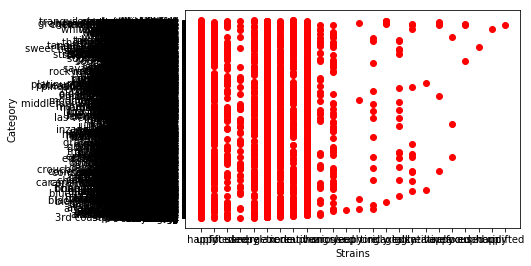

In [155]:
#cat_hybrid = unedited_df[unedited_df['category'] == 'hybrid']
#cat_indica = unedited_df[unedited_df['category'] == 'indica']
#cat_sativa = unedited_df[unedited_df['category'] == 'sativa']
plt.scatter(unedited_df['effect_1'], unedited_df['strain'], color='r')
#plt.scatter(cat_indica, color='g')
#plt.scatter(cat_sativa, color='b')
plt.xlabel('Strains')
plt.ylabel('Category')
plt.show()

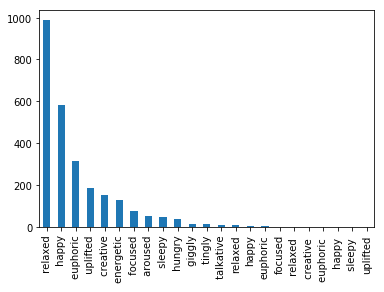

In [133]:
pd.value_counts(unedited_df['effect_1']).plot.bar()
plt.show()

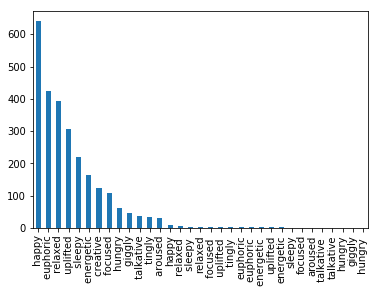

In [134]:
pd.value_counts(unedited_df['effect_2']).plot.bar()
plt.show()

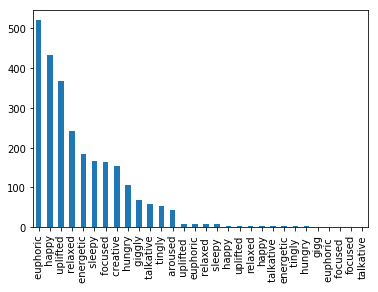

In [135]:
pd.value_counts(unedited_df['effect_3']).plot.bar()
plt.show()

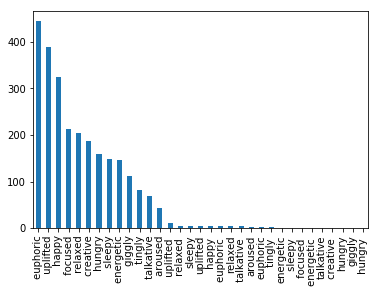

In [136]:
pd.value_counts(unedited_df['effect_4']).plot.bar()
plt.show()

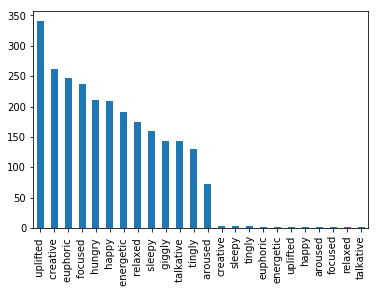

In [137]:
pd.value_counts(unedited_df['effect_5']).plot.bar()
plt.show()

In [68]:
df['effect_1'].value_counts()

 relaxed      988
 happy        585
 euphoric     317
none          205
 uplifted     189
 creative     153
 energetic    132
 focused       77
 aroused       55
 sleepy        47
 hungry        37
 giggly        16
 tingly        13
 talkative     11
happy           4
 relaxed        3
relaxed         2
 creative       2
euphoric        2
 euphoric       1
 sleepy         1
uplifted        1
 happy          1
focused         1
Name: effect_1, dtype: int64

### Run Baseline KNN Model

#### Test Train Split

In [157]:
features = final_df.drop('strain',axis=1)

In [159]:
features.columns

Index(['cat__hybrid', 'cat__indica', 'cat__sativa', 'eff1__ aroused',
       'eff1__ creative', 'eff1__ creative ', 'eff1__ energetic',
       'eff1__ euphoric', 'eff1__ euphoric ', 'eff1__ focused',
       ...
       'flav3__strawberry', 'flav3__sweet', 'flav3__tar', 'flav3__tea',
       'flav3__tobacco', 'flav3__tree fruit', 'flav3__tropical',
       'flav3__vanilla', 'flav3__violet', 'flav3__woody'],
      dtype='object', length=530)

In [205]:
X = features
y = final_df.index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 17)

In [220]:
knn = KNeighborsClassifier(n_neighbors=6, algorithm='ball_tree').fit(X_train, y_train)

In [221]:
pred = knn.predict(X_test)

In [222]:
pred

array([ 458,  146,  302,  180,  514,  200,  561,  248, 1896,  666,  344,
        407,  735,  180,  333,  248, 1007,   94,  120,  315,  173,  248,
        469,  377,  655,  218,  170,  758,  269,  220,  140,  119,   78,
         85,  249,   55,   82,  290,  269,  122,  416,  345,   33,   59,
        180,   68,  174,  259,  149, 1252,  425,   93,  503,  180,  180,
         44,  837,  248,  220,  180,    5,  166,   93, 1600,  290,   85,
        426,   86,    9,  180,  706,   64,  468,   28,   10,  253,  269,
        685,   29,  180,  166,  158,  797,  158,  180,  220,  185,  103,
         64,   25,  180,  932,   75,  425,  256,   83,  426,   81, 1571,
        932,   96,  522,  333,   28, 1148, 1036,  217,  180,  244,  246,
       1034,  120,  220,  337,  570,  306,  277, 2790,  464,    8, 1030,
        326,  165,  345,  930,  157,  437,  394,  257,   79,  252,   93,
        228,  368,  674,  136,  167,   59,   67,  213,  247,  248,  218,
        379,  448,   28,  274,  248,   29,  747,  1

#### Predictions and Evaluations

In [223]:
print(confusion_matrix(y_test,pred))

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [224]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          33       0.00    

### Feature Selection

#### Use F-Test to View Top Variables

In [225]:
selector=SelectKBest(f_regression, k=40)
selector.fit(X_train, y_train)
best_columns = X_train.columns[selector.get_support()]
other_columns = X_train.columns[~selector.get_support()]

In [226]:
best_columns

Index(['eff1__relaxed', 'eff2__ talkative', 'eff2__happy', 'eff3__euphoric',
       'eff3__uplifted', 'eff4__ euphoric ', 'eff4__aroused', 'eff4__uplifted',
       'eff5__ sleepy ', 'eff5__energetic', 'eff5__sleepy', 'eff5__tingly',
       'med1__ eye pressure ', 'med1__ nausea', 'med1__ spasticity',
       'med1__stress', 'med2__depression', 'med2__stress', 'med3__ fatigue',
       'med3__pain', 'med4__fatigue', 'med4__insomnia',
       'med4__lack of appetite', 'med5__fatigue', 'med5__lack of appetite',
       'med5__nausea', 'neg1__dry eyes', 'neg1__dry mouth', 'neg2__dry eyes',
       'neg3__dizzy', 'neg3__paranoid', 'neg4__anxious', 'neg4__headache',
       'neg5__anxious', 'neg5__headache', 'flav1__blueberry',
       'flav1__pineapple', 'flav1__strawberry', 'flav2__blueberry',
       'flav3__blueberry'],
      dtype='object')

#### Use Recursive Feature Elimination

In [227]:
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')
selector.fit(X_train, y_train)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [228]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]

In [229]:
selected_columns

Index(['med4__depression', 'med5__headaches'], dtype='object')

In [230]:
removed_columns

Index(['cat__hybrid', 'cat__indica', 'cat__sativa', 'eff1__ aroused',
       'eff1__ creative', 'eff1__ creative ', 'eff1__ energetic',
       'eff1__ euphoric', 'eff1__ euphoric ', 'eff1__ focused',
       ...
       'flav3__strawberry', 'flav3__sweet', 'flav3__tar', 'flav3__tea',
       'flav3__tobacco', 'flav3__tree fruit', 'flav3__tropical',
       'flav3__vanilla', 'flav3__violet', 'flav3__woody'],
      dtype='object', length=528)

#### Removing Variables Based on Correlation Coeeficient

KeyboardInterrupt: 

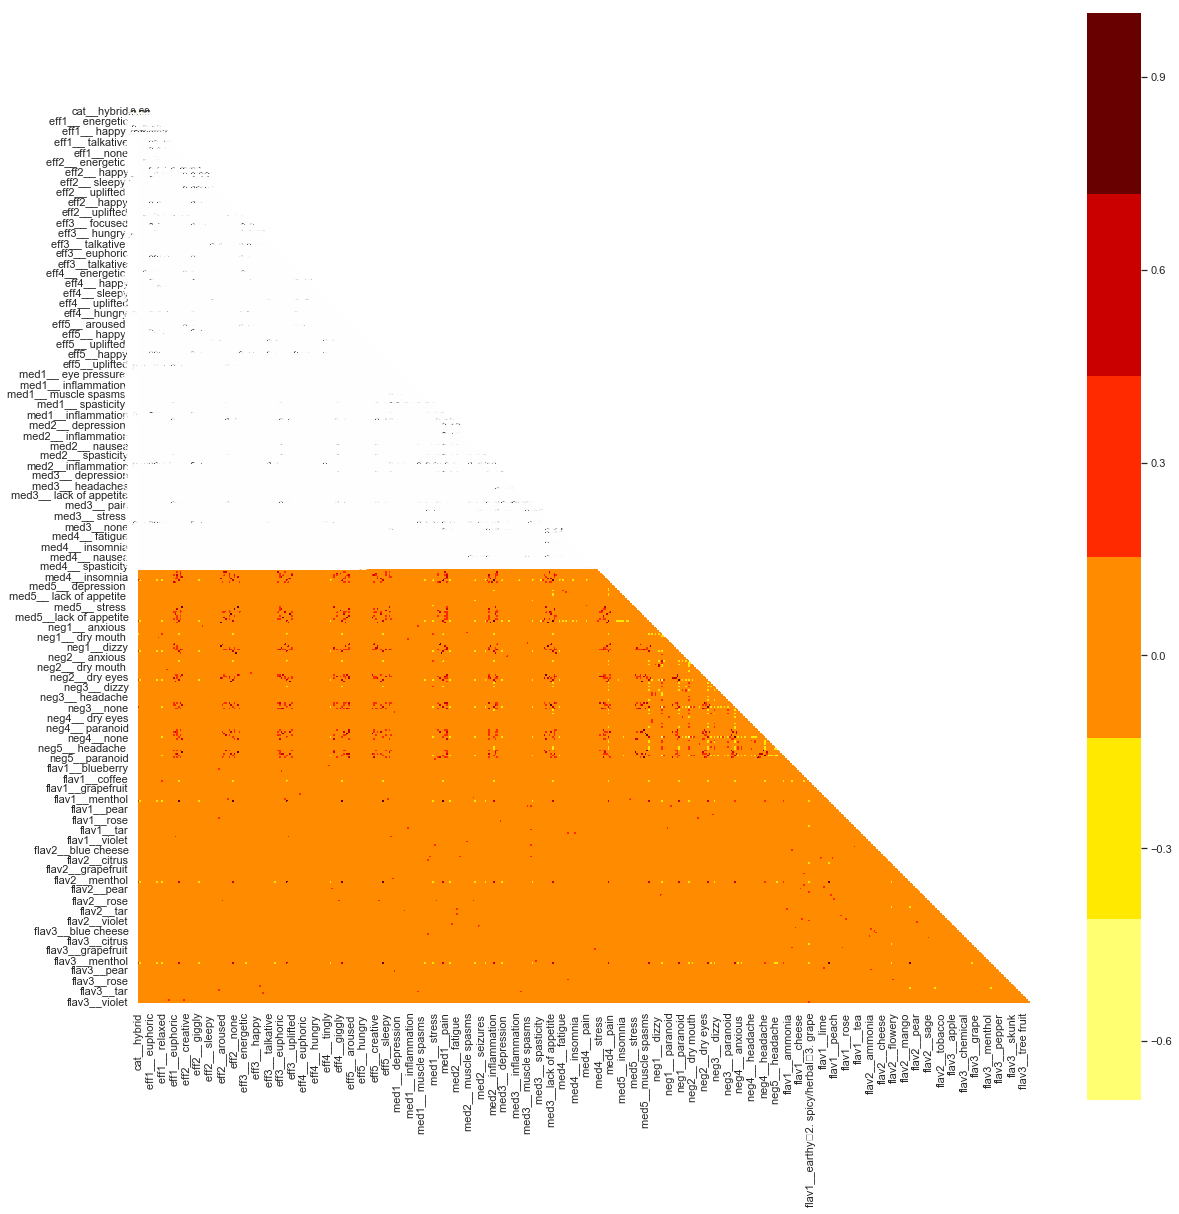

In [232]:
#Plots a heatmap of correlation between features with masking
fig, ax = plt.subplots(figsize=(20,20))
mask=np.zeros_like(final_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
color_map = sns.color_palette("hot_r")
ax = tqdm(sns.heatmap(final_df.corr(), cmap = color_map, mask=mask, square=True, annot=True))

### Query

In [ ]:
def print_similar_strains(query=None):
    for strain in final_df['strain']:
        print(final_df.ix[id]['strain'])

### Find Important Words

In [565]:
!pip install textblob

    100% |████████████████████████████████| 645kB 7.9MB/s eta 0:00:01  11% |███▋                            | 71kB 525kB/s eta 0:00:02


In [566]:
import math
from textblob import TextBlob as tb

In [ ]:
def tf(word, blob):
    return blob.words.count(word)/len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist))/(1 + n_containing(word, bloblist))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)